# Frame element Response

In [14]:
import numpy as np
import openseespy.opensees as ops
import opstool as opst
import matplotlib.pyplot as plt

OPSTOOL ::  Model data has been saved to _OPSTOOL_ODB/ModelData-None.nc!

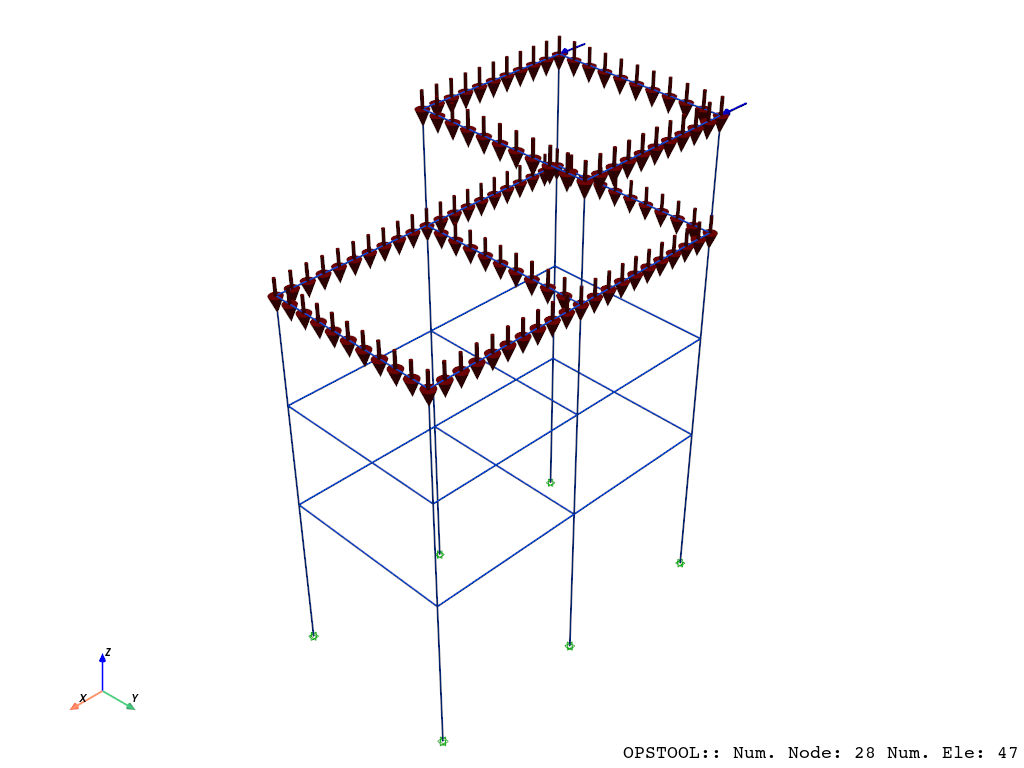

In [15]:
opst.load_ops_examples("Frame3D2")  # or your model code here

# add beam loads
ops.timeSeries("Linear", 1)
ops.pattern("Plain", 1, 1)
ops.load(6, 10, 0.0, 0.0, 0.0, 0.0, 0.0)
ops.load(8, 10, 0.0, 0.0, 0.0, 0.0, 0.0)
for etag in [5, 6, 7, 8, 15, 16, 17, 18, 19, 20, 21]:
    ops.eleLoad("-ele", etag, "-type", "-beamUniform", 0.0, -10)

# plot
opst.vis.pyvista.set_plot_props(notebook=True)
fig = opst.vis.pyvista.plot_model(show_nodal_loads=True, show_ele_loads=True)
fig.show(jupyter_backend="static")

## Result Saving

In [16]:
ops.system("BandGeneral")
# Create the constraint handler, the transformation method
ops.constraints("Transformation")
# Create the DOF numberer, the reverse Cuthill-McKee algorithm
ops.numberer("RCM")
# Create the convergence test, the norm of the residual with a tolerance of
# 1e-12 and a max number of iterations of 10
ops.test("NormDispIncr", 1.0e-12, 10, 3)
# Create the solution algorithm, a Newton-Raphson algorithm
ops.algorithm("Newton")
# Create the integration scheme, the LoadControl scheme using steps of 0.1
ops.integrator("LoadControl", 0.1)
# Create the analysis object
ops.analysis("Static")

In [17]:
ODB = opst.post.CreateODB(odb_tag=1, elastic_frame_sec_points=9)
for i in range(10):
    ops.analyze(1)
    ODB.fetch_response_step()
ODB.save_response()

OPSTOOL ::  All responses data with odb_tag = 1 saved in _OPSTOOL_ODB/RespStepData-1.nc!

## Result Reading

In [18]:
all_resp = opst.post.get_element_responses(odb_tag=1, ele_type="Frame")

OPSTOOL ::  Loading Frame None response data from _OPSTOOL_ODB/RespStepData-1.nc ...

The result is an ``xarray DataSet`` object, and we can access the associated DataArray objects through ``.data_vars``.

In [19]:
all_resp.data_vars

Data variables:
    localForces          (time, eleTags, localDofs) float64 50kB 0.0 ... 89.87
    basicForces          (time, eleTags, basicDofs) float64 25kB 0.0 ... -1.6...
    basicDeformations    (time, eleTags, basicDofs) float64 25kB 0.0 ... -2.0...
    plasticDeformation   (time, eleTags, basicDofs) float64 25kB 0.0 0.0 ... 0.0
    sectionForces        (time, eleTags, secPoints, secDofs) float64 223kB -0...
    sectionDeformations  (time, eleTags, secPoints, secDofs) float64 223kB 0....
    sectionLocs          (time, eleTags, secPoints) float64 37kB 0.0 ... 1.0

The ``variable names``, along with their ``dimensions`` and ``coordinates``, are displayed above.
The first four represent the resistance and deformation at both ends of the element, while the last three are quantities related to the cross-section.

In [20]:
all_resp["basicForces"]

<xarray.DataArray 'basicForces' (time: 11, eleTags: 47, basicDofs: 6)> Size: 25kB
array([[[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        ...,
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00]],

       [[-4.75025934e+03,  1.09512766e+06,  1.30496582e+06,
          5.88330860e+05,  1.13577970e+06,  3.84109733e+02],
        [-4.75025934e+03, -1.09512766e+06, -1.30496582e+06,
          5.88330860e+05,  1.13577970e+06, -3.84109733e+02],
        [-4.74974066e+03, -1.01388168e+06, -1.28301526e+06,
         -5.86497869e+05, -1.13461269e+06,  1.15370696e+02],
...
        [-4.45690936e+02,  7.66474510e+01, -7.66474510e+01,
          1.56379147e+05, -1.56379147e+05,  3.50827155e-12],
        [-1.05462515e+03,  6.29041775e+02, -6.29041775e+02,
          2.65055041e+05, -2.65055041e+05,  4.20992586e-11],
        [-5.87808081e+02, -8.08818760e+01,  8.08818760e+01,
          1.50153532e+05, -1.50153532e+05,  5.87635485e-11]],

       [[-4.75025934e+04,  1.09512766e+07,  1.30496582e+07,
          5.88330860e+06,  1.13577970e+07,  3.84109733e+03],
        [-4.75025934e+04, -1.09512766e+07, -1.30496582e+07,
          5.88330860e+06,  1.13577970e+07, -3.84109733e+03],
        [-4.74974066e+04, -1.01388168e+07, -1.28301526e+07,
         -5.86497869e+06, -1.13461269e+07,  1.15370696e+03],
        ...,
        [-4.95212151e+02,  8.51638344e+01, -8.51638344e+01,
          1.73754608e+05, -1.73754608e+05,  0.00000000e+00],
        [-1.17180572e+03,  6.98935305e+02, -6.98935305e+02,
          2.94505601e+05, -2.94505601e+05, -2.80661724e-11],
        [-6.53120090e+02, -8.98687511e+01,  8.98687511e+01,
          1.66837258e+05, -1.66837258e+05, -1.66642899e-11]]])
Coordinates:
  * eleTags    (eleTags) int32 188B 1 2 3 4 5 6 7 8 ... 40 41 42 43 44 45 46 47
  * basicDofs  (basicDofs) <U3 72B 'N' 'MZ1' 'MZ2' 'MY1' 'MY2' 'T'
  * time       (time) float64 88B 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0

In [21]:
all_resp.attrs

{'localDofs': 'local coord system dofs at end 1 and end 2',
 'basicDofs': 'basic coord system dofs at end 1 and end 2',
 'secPoints': 'section points No.',
 'secDofs': 'section forces and deformations Dofs. Note that the section DOFs are only valid for <Elastic Section>, <Elastic Shear Section>, and <Fiber Section>. For <Aggregator Section>, you should carefully check the data, as it may not correspond directly to the DOFs.'}

### Section response

Sometimes we are more concerned with the response at the section level, which can be easily extracted.
For example, extracting section forces involves four dimensions: ``time (time)``, ``element IDs (eleTags)``, ``section locations (secLocs)``, and ``degrees of freedom (secDoFs)``.

In [22]:
sec_forces = all_resp["sectionForces"]
sec_forces

<xarray.DataArray 'sectionForces' (time: 11, eleTags: 47, secPoints: 9,
                                   secDofs: 6)> Size: 223kB
array([[[[-0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          -0.00000000e+00, -0.00000000e+00,  0.00000000e+00],
         [-0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          -0.00000000e+00, -0.00000000e+00,  0.00000000e+00],
         [-0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          -0.00000000e+00, -0.00000000e+00,  0.00000000e+00],
         ...,
         [-0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          -0.00000000e+00, -0.00000000e+00,  0.00000000e+00],
         [-0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          -0.00000000e+00, -0.00000000e+00,  0.00000000e+00],
         [-0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          -0.00000000e+00, -0.00000000e+00,  0.00000000e+00]],

        [[-0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          -0.00000000e+00, -0.00000000e+00,  0.00000000e+00],
         [-0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          -0.00000000e+00, -0.00000000e+00,  0.00000000e+00],
         [-0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          -0.00000000e+00, -0.00000000e+00,  0.00000000e+00],
...
         [-1.17180572e+03, -6.98935305e+02,  9.48148227e-15,
          -2.94505601e+05,  2.44472176e-13, -2.80661724e-11],
         [-1.17180572e+03, -6.98935305e+02,  9.48148227e-15,
          -2.94505601e+05,  2.44472176e-13, -2.80661724e-11],
         [-1.17180572e+03, -6.98935305e+02,  9.48148227e-15,
          -2.94505601e+05,  2.44472176e-13, -2.80661724e-11]],

        [[-6.53120090e+02,  8.98687511e+01, -2.95017344e-15,
          -1.66837258e+05,  1.04773790e-13, -1.66642899e-11],
         [-6.53120090e+02,  8.98687511e+01, -2.95017344e-15,
          -1.66837258e+05,  1.04773790e-13, -1.66642899e-11],
         [-6.53120090e+02,  8.98687511e+01, -2.95017344e-15,
          -1.66837258e+05,  1.04773790e-13, -1.66642899e-11],
         ...,
         [-6.53120090e+02,  8.98687511e+01, -2.95017344e-15,
          -1.66837258e+05,  1.04773790e-13, -1.66642899e-11],
         [-6.53120090e+02,  8.98687511e+01, -2.95017344e-15,
          -1.66837258e+05,  1.04773790e-13, -1.66642899e-11],
         [-6.53120090e+02,  8.98687511e+01, -2.95017344e-15,
          -1.66837258e+05,  1.04773790e-13, -1.66642899e-11]]]])
Coordinates:
  * eleTags    (eleTags) int32 188B 1 2 3 4 5 6 7 8 ... 40 41 42 43 44 45 46 47
  * secPoints  (secPoints) int32 36B 1 2 3 4 5 6 7 8 9
  * secDofs    (secDofs) <U2 48B 'N' 'MZ' 'VY' 'MY' 'VZ' 'T'
  * time       (time) float64 88B 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0

In [23]:
sec_locs = all_resp["sectionLocs"].sel(eleTags=6, time=0).data
sec_locs

array([0.   , 0.125, 0.25 , 0.375, 0.5  , 0.625, 0.75 , 0.875, 1.   ])

We can select the response of multiple elements. 
``.isel(time=-1)`` is used to retrieve the data at the last time step, where ``.isel`` means indexing by position.

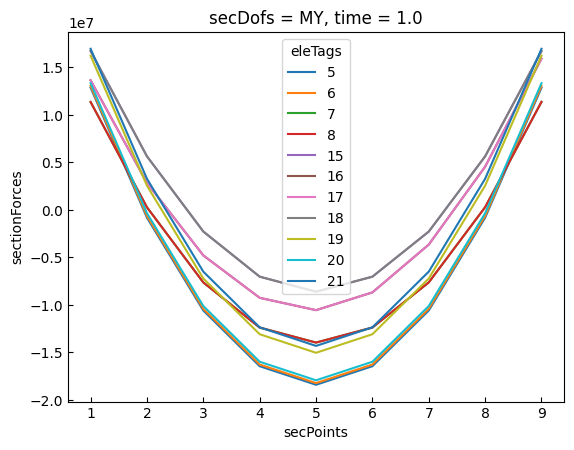

In [24]:
sec_forces_my = sec_forces.sel(
    eleTags=[5, 6, 7, 8, 15, 16, 17, 18, 19, 20, 21],
    secDofs="MY",
).isel(time=-1)
# sec_forces_my.coords["secPoints"] = sec_locs

# plot
sec_forces_my.plot.line(x="secPoints", )
plt.show()

Here, we retrieve the moment about the local y-axis for element 6:

Note: ``.sel`` is the abbreviation for "select".

In [25]:
sec_forces_my = sec_forces.sel(eleTags=6, secDofs="MY")
sec_forces_my

<xarray.DataArray 'sectionForces' (time: 11, secPoints: 9)> Size: 792B
array([[        0.        ,         0.        ,         0.        ,
                0.        ,         0.        ,         0.        ,
                0.        ,         0.        ,         0.        ],
       [  1302830.277124  ,    -64357.222876  ,  -1040919.722876  ,
         -1626857.222876  ,  -1822169.722876  ,  -1626857.222876  ,
         -1040919.722876  ,    -64357.222876  ,   1302830.277124  ],
       [  2605660.55424799,   -128714.44575201,  -2081839.44575201,
         -3253714.44575201,  -3644339.44575201,  -3253714.44575201,
         -2081839.44575201,   -128714.44575201,   2605660.55424799],
       [  3908490.83137199,   -193071.66862801,  -3122759.16862801,
         -4880571.66862801,  -5466509.16862801,  -4880571.66862801,
         -3122759.16862801,   -193071.66862801,   3908490.83137199],
       [  5211321.10849599,   -257428.89150401,  -4163678.89150401,
         -6507428.89150401,  -7288678.89150401,  -6507428.89150401,
         -4163678.89150401,   -257428.891504  ,   5211321.108496  ],
       [  6514151.38561999,   -321786.11438001,  -5204598.61438001,
         -8134286.11438001,  -9110848.61438001,  -8134286.11438001,
         -5204598.61438001,   -321786.11438001,   6514151.38561999],
       [  7816981.66274399,   -386143.33725601,  -6245518.33725601,
         -9761143.33725601, -10933018.33725601,  -9761143.33725601,
         -6245518.33725601,   -386143.33725601,   7816981.66274399],
       [  9119811.93986799,   -450500.56013201,  -7286438.06013201,
        -11388000.56013201, -12755188.06013201, -11388000.56013201,
         -7286438.06013201,   -450500.56013201,   9119811.93986799],
       [ 10422642.21699198,   -514857.78300802,  -8327357.78300802,
        -13014857.78300801, -14577357.78300801, -13014857.78300802,
         -8327357.78300802,   -514857.78300802,  10422642.21699198],
       [ 11725472.49411598,   -579215.00588402,  -9368277.50588402,
        -14641715.00588402, -16399527.50588402, -14641715.00588402,
         -9368277.50588402,   -579215.00588402,  11725472.49411598],
       [ 13028302.77123997,   -643572.22876002, -10409197.22876002,
        -16268572.22876002, -18221697.22876002, -16268572.22876003,
        -10409197.22876002,   -643572.22876002,  13028302.77123998]])
Coordinates:
    eleTags    int32 4B 6
  * secPoints  (secPoints) int32 36B 1 2 3 4 5 6 7 8 9
    secDofs    <U2 8B 'MY'
  * time       (time) float64 88B 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0

We can plot the moment at different section locations for various time steps.

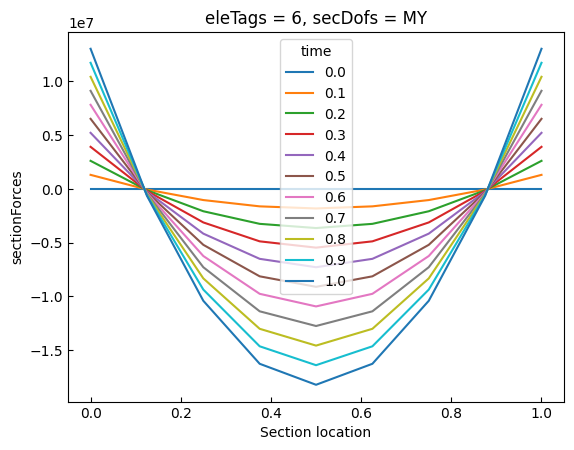

In [26]:
sec_forces_my.coords["secPoints"] = sec_locs
times = np.linspace(0, 1, 11)
sec_forces_my.coords["time"] = [f"{d:.1f}" for d in times]

# plot
sec_forces_my.plot.line(x="secPoints")
plt.xlabel("Section location")
plt.show()